In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### 1. Read the column description and ensure you understand each attribute well 

In [3]:
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
# Columns description

##	ID	Customer ID
##	Age	Customer's age in completed years
##	Experience	#years of professional experience
##	Income	Annual income of the customer ($000)
##	ZIPCode	Home Address ZIP code
##	Family	Family size of the customer
##	CCAvg	Avg. spending on credit cards per month ($000)
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
##	Mortgage	Value of house mortgage if any. ($000)
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?
##	Securities Account	Does the customer have a securities account with the bank?
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
##	Online	Does the customer use internet banking facilities?
##	CreditCard	Does the customer use a credit card issued by UniversalBank?


In [6]:
data.shape

(5000, 14)

In [7]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
data.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [11]:
data['Experience'] = data['Experience'].abs()

data.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.134600    11.415189     0.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### 2. Study the data distribution in each attribute, share your findings. (5 points)

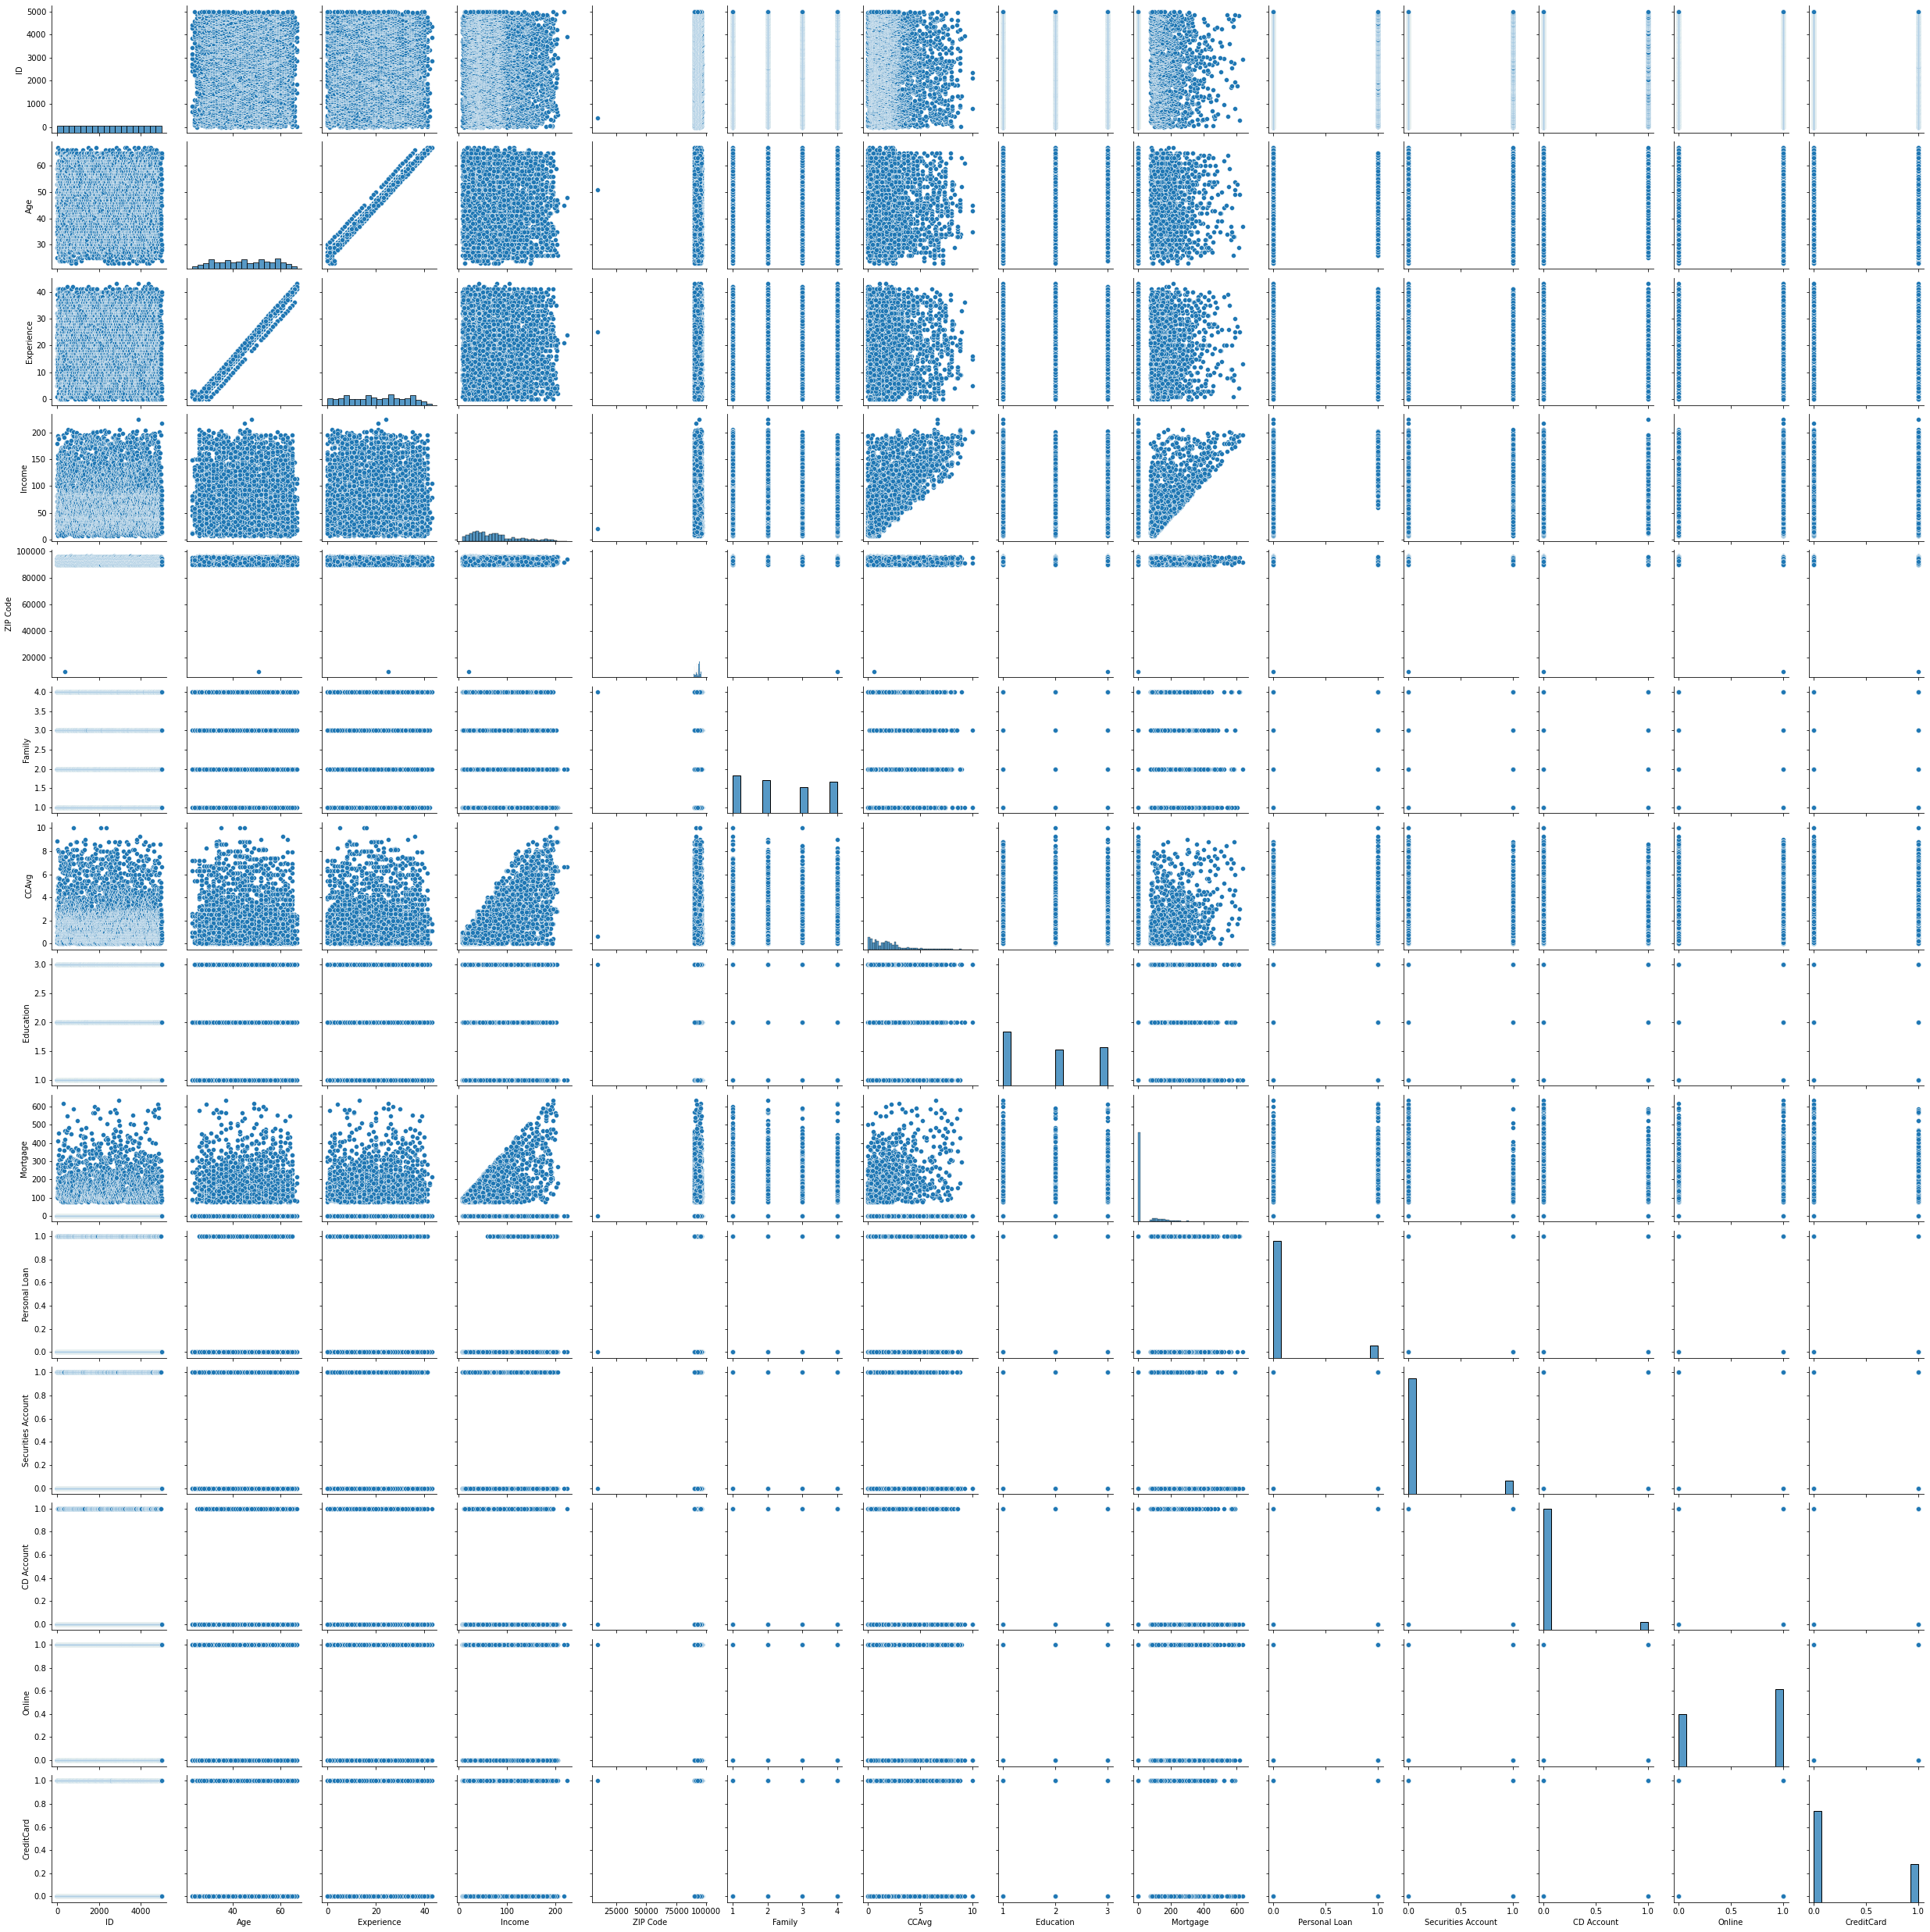

In [12]:
sns.pairplot(data)

In [13]:
# Findings

# Age and Experience have strong positive relation
# Experience and Age have strong positive relation
# Age and Income have no linear relationship
# Experience and Income have no linear relationship
# Age and CCAvg have no linear relationship
# Experience and CCAvg have no linear relationship
# CD Account, Online, Credit card are almost saame with other relations

### 3. Get the target column distribution. Your comments 

In [14]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [15]:
# There are total 5000
# People who are not having Personal Loans are 4520
# People who are having Personal Loans are 480

### 4. Split the data into training and test set in the ratio of 70:30 respectively 

In [16]:
X = data.drop(['Personal Loan'], 1)
y = data['Personal Loan']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
### 6. Print the confusion matrix for all the above models (5 points)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()

models = [lr, knn, nb]
scores = []
cm = []
cr = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print("Accuracy of " + type(model).__name__ + " is\n", accuracy_score(y_test, y_pred))
    cm.append(confusion_matrix(y_test, y_pred))
    print("Confusion matrix of " + type(model).__name__ + " is\n", confusion_matrix(y_test, y_pred))
    cr.append(classification_report(y_test, y_pred))
    print("Classification Report of " + type(model).__name__ + " is\n", classification_report(y_test, y_pred))
    print('\n')

Accuracy of LogisticRegression is
 0.9133333333333333
Confusion matrix of LogisticRegression is
 [[1319   32]
 [  98   51]]
Classification Report of LogisticRegression is
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.61      0.34      0.44       149

    accuracy                           0.91      1500
   macro avg       0.77      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



Accuracy of KNeighborsClassifier is
 0.902
Confusion matrix of KNeighborsClassifier is
 [[1349    2]
 [ 145    4]]
Classification Report of KNeighborsClassifier is
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.67      0.03      0.05       149

    accuracy                           0.90      1500
   macro avg       0.78      0.51      0.50      1500
weighted avg       0.88      0.90      0.86      1500



Accur

In [19]:
# Scaled KNN
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
knn.fit(X_train_scaled, y_train)

predicted_labels = knn.predict(X_test_scaled)

print(f'Accuracy score of Scaled KNN is\n {accuracy_score(y_test, predicted_labels)}')
print(f'Confusion matrix of Scaled KNN is\n {confusion_matrix(y_test, predicted_labels)}')
print(f'Classification report of Scaled KNN is\n {classification_report(y_test, predicted_labels)}')

Accuracy score of Scaled KNN is
 0.9453333333333334
Confusion matrix of Scaled KNN is
 [[1347    4]
 [  78   71]]
Classification report of Scaled KNN is
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.95      0.48      0.63       149

    accuracy                           0.95      1500
   macro avg       0.95      0.74      0.80      1500
weighted avg       0.95      0.95      0.94      1500



### 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [20]:
# Among Logistic Regression, Naive Bayes, KNN and Scaled KNN models, 
# Scaled KNN is the best model in this case.
# Because it has the highest accuracy compared to other models.
# Type-I and Type-II Errors are lower for this model.